In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('./data/Diabetes_prediction.csv')

# Drop the 'Diagnosis' column to perform unsupervised learning
X = data.drop('Diagnosis', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.16916344,  0.84388194, -1.13650602, ...,  0.27717891,
        -0.88689813, -1.60333665],
       [ 0.16916344, -0.35714958, -0.11274294, ..., -0.41303606,
         1.08302816,  0.11277251],
       [-0.56954153, -0.58060442, -0.64267896, ..., -0.94495457,
         1.13754671,  0.34347898],
       ...,
       [-1.30824649, -0.09469611, -0.58071939, ..., -0.73217763,
         1.56639535,  1.08367856],
       [-1.30824649, -1.67851002, -1.17268119, ...,  1.73127265,
        -0.33380688,  0.25225371],
       [-1.30824649, -0.60599888, -0.2211335 , ...,  1.53594517,
         0.78523145, -0.10346468]])

In [4]:
# Create KMeans instance with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model
kmeans.fit(X_scaled)

# Cluster labels
labels = kmeans.labels_


In [5]:
# Add the cluster labels to the original dataframe
data['Cluster'] = labels

# Review the clustering result against the Diagnosis
cluster_comparison = pd.crosstab(data['Cluster'], data['Diagnosis'])
print(cluster_comparison)


Diagnosis    0    1
Cluster            
0          339  150
1          355  156


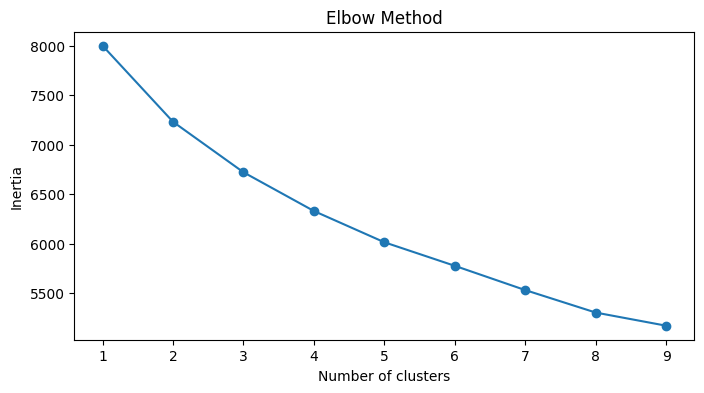

In [6]:
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


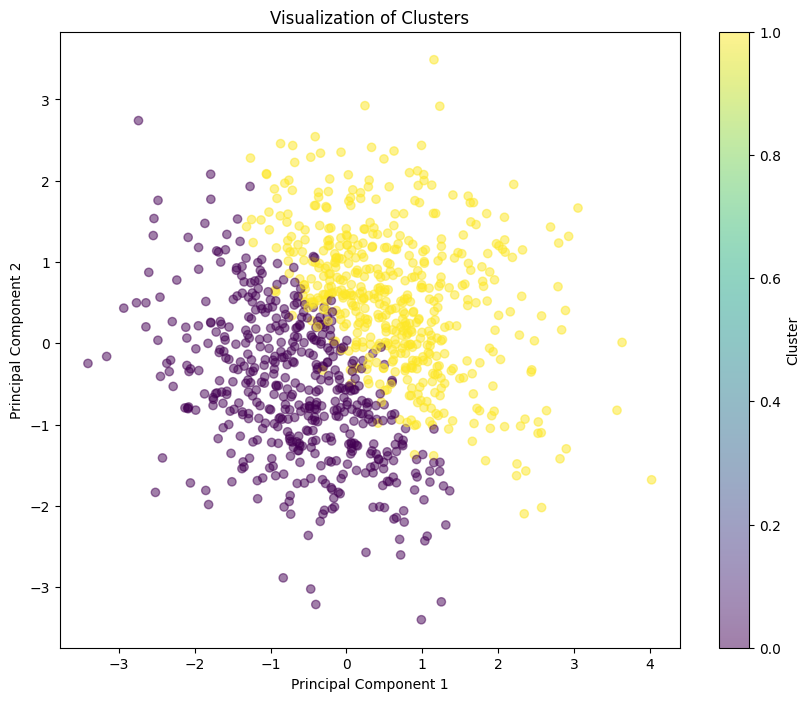

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

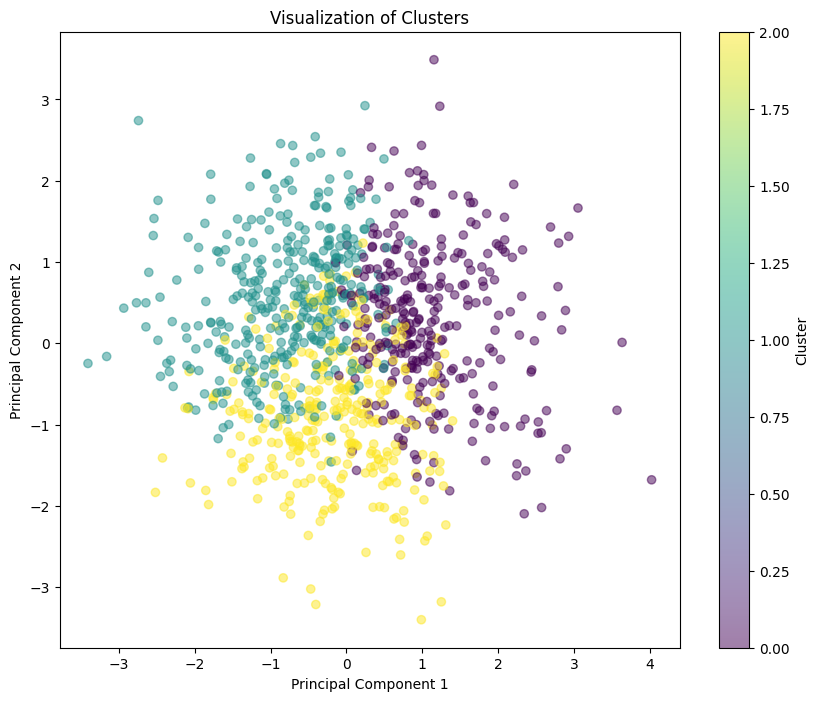

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('./data/Diabetes_prediction.csv')

# Check for any missing values and handle them (if necessary)
data.fillna(data.mean(), inplace=True)

# Selecting features to use for clustering (excluding the Diagnosis for unsupervised learning)
features = data.drop('Diagnosis', axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # You can choose the number of clusters
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the DataFrame
data['Cluster'] = clusters

# Plotting the clusters
# We'll plot the first two principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()
